<div align='center'>
    <h1>Projek Tugas Besar Dasar Kecerdasan Artifisial</h1>
    <h3>Penentuan Tingkat Risiko Diabetes Berdasarkan Gejala Pasien</h3>
</div>

<div align="center">
    <p>Muhammad Azigha Azhar (103012300143)</p>
    <p>Ahmad Raffi Arasy (103012330207)</p>
    <p>Axel Davin Lazar Panenggak (103012330386)</p>
</div>

In [18]:
import numpy as np
import pandas as pd
import os
import kagglehub
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [19]:
#Unduh dataset Pima Indians Diabetes
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path ke dataset:", path)


Path ke dataset: C:\Users\ASUS\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1


In [20]:
#Tampilkan isi folder dan baca file CSV
for file in os.listdir(path):
    print(file)

df = pd.read_csv(os.path.join(path, 'diabetes.csv'))
df.head()


diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
#Pilih fitur yang digunakan dalam fuzzy
df_fuzzy = df[['Age', 'BMI', 'Glucose', 'DiabetesPedigreeFunction', 'Outcome']]
df_fuzzy.describe()

,Age,BMI,Glucose,DiabetesPedigreeFunction,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,33.240885,31.992578,120.894531,0.471876,0.348958
std,11.760232,7.884160,31.972618,0.331329,0.476951
min,21.000000,0.000000,0.000000,0.078000,0.000000
25%,24.000000,27.300000,99.000000,0.243750,0.000000
50%,29.000000,32.000000,117.000000,0.372500,0.000000
75%,41.000000,36.600000,140.250000,0.626250,1.000000
max,81.000000,67.100000,199.000000,2.420000,1.000000


In [22]:
# 🎚️ Definisikan input (Antecedent) dan output (Consequent)
glucose = ctrl.Antecedent(np.arange(0, 201, 1), 'glucose')
bmi = ctrl.Antecedent(np.arange(0, 51, 1), 'bmi')
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')
pedigree = ctrl.Antecedent(np.arange(0, 2.6, 0.1), 'pedigree')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# 🎛️ Fungsi keanggotaan untuk glucose
glucose['normal'] = fuzz.trimf(glucose.universe, [0, 90, 100])
glucose['pre_diabetes'] = fuzz.trimf(glucose.universe, [90, 115, 125])
glucose['tinggi'] = fuzz.trimf(glucose.universe, [120, 160, 200])

# 🎛️ Fungsi keanggotaan untuk BMI
bmi['normal'] = fuzz.trimf(bmi.universe, [0, 18.5, 24.9])
bmi['gemuk'] = fuzz.trimf(bmi.universe, [23, 27, 30])
bmi['obesitas'] = fuzz.trimf(bmi.universe, [28, 40, 50])

# 🎛️ Fungsi keanggotaan untuk usia
age['muda'] = fuzz.trimf(age.universe, [0, 20, 30])
age['dewasa'] = fuzz.trimf(age.universe, [25, 40, 55])
age['tua'] = fuzz.trimf(age.universe, [50, 75, 100])

# 🎛️ Fungsi keanggotaan untuk pedigree (riwayat keluarga)
pedigree['rendah'] = fuzz.trimf(pedigree.universe, [0.0, 0.3, 0.6])
pedigree['sedang'] = fuzz.trimf(pedigree.universe, [0.5, 1.0, 1.5])
pedigree['tinggi'] = fuzz.trimf(pedigree.universe, [1.3, 1.8, 2.5])

# 🎛️ Fungsi keanggotaan untuk output risk
risk['rendah'] = fuzz.trimf(risk.universe, [0, 25, 50])
risk['sedang'] = fuzz.trimf(risk.universe, [30, 50, 70])
risk['tinggi'] = fuzz.trimf(risk.universe, [60, 80, 100])


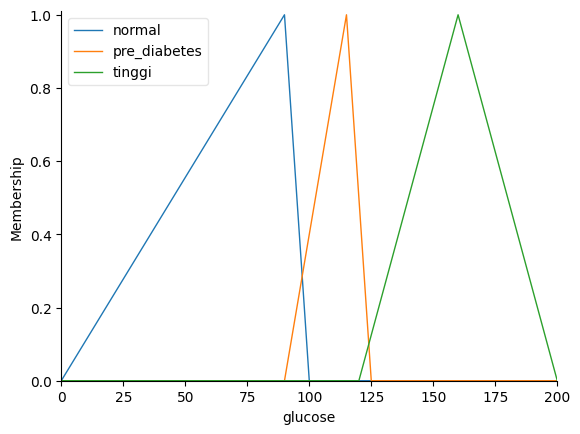

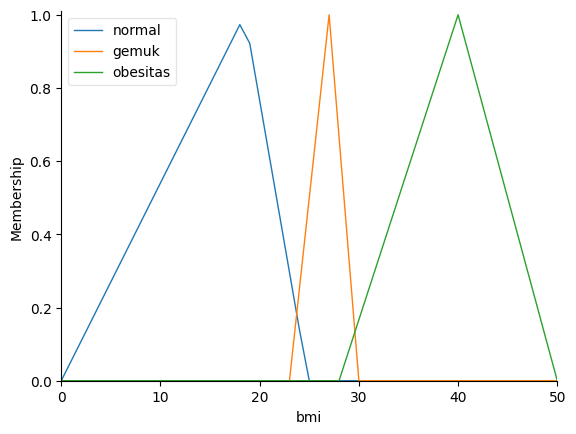

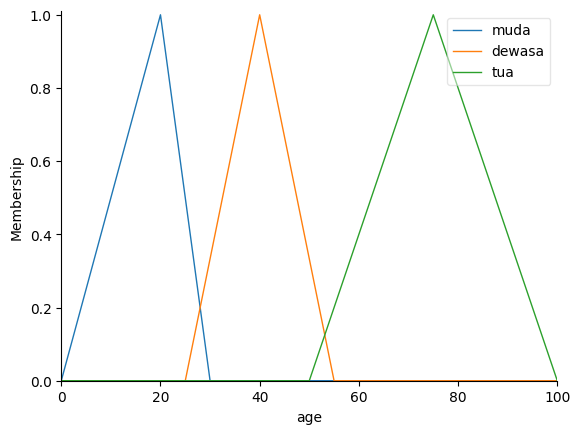

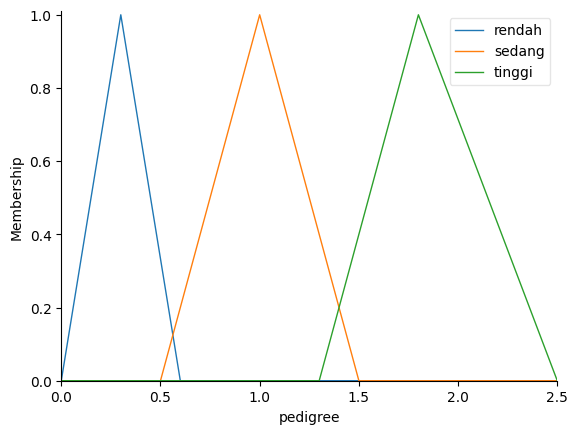

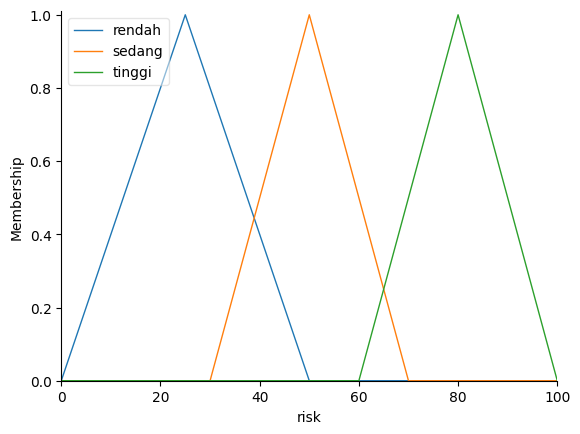

In [37]:
# 📊 Tampilkan grafik fungsi keanggotaan
glucose.view()
bmi.view()
age.view()
pedigree.view()
risk.view()


In [38]:
# 📜 Aturan fuzzy Mamdani
rule1 = ctrl.Rule(glucose['tinggi'] & bmi['obesitas'] & pedigree['tinggi'], risk['tinggi'])
rule2 = ctrl.Rule(glucose['pre_diabetes'] & bmi['gemuk'] & pedigree['sedang'], risk['sedang'])
rule3 = ctrl.Rule(glucose['normal'] & bmi['normal'] & pedigree['rendah'], risk['rendah'])
rule4 = ctrl.Rule(glucose['tinggi'] & age['tua'], risk['tinggi'])
rule5 = ctrl.Rule(glucose['normal'] & age['muda'] & bmi['normal'], risk['rendah'])
rule6 = ctrl.Rule(glucose['pre_diabetes'] & age['dewasa'], risk['sedang'])
rule7 = ctrl.Rule(bmi['obesitas'] & pedigree['tinggi'], risk['tinggi'])
rule8 = ctrl.Rule(age['tua'] & pedigree['tinggi'], risk['tinggi'])
rule9 = ctrl.Rule(age['muda'] & glucose['normal'] & pedigree['rendah'], risk['rendah'])
rule10 = ctrl.Rule(glucose['tinggi'] & bmi['gemuk'], risk['tinggi'])
rule11 = ctrl.Rule(glucose['pre_diabetes'] & pedigree['tinggi'], risk['sedang'])



In [39]:
# Tambahkan ke sistem kontrol
mamdani_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5,
    rule6, rule7, rule8, rule9, rule10, rule11
])

# 🧠 Buat objek simulasi
mamdani_sim = ctrl.ControlSystemSimulation(mamdani_ctrl)


Hasil prediksi risiko (Mamdani): 80.00000000000007


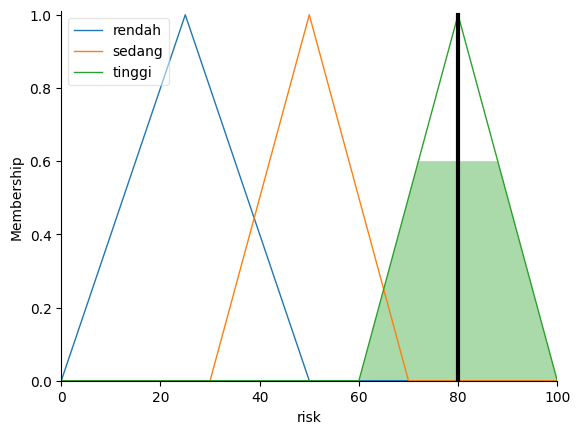

In [40]:
# Beri input yang jelas aktif pada semua fuzzy set
mamdani_sim.input['glucose'] = 150    # masuk 'tinggi'
mamdani_sim.input['bmi'] = 35         # masuk 'obesitas'
mamdani_sim.input['age'] = 65         # masuk 'tua'
mamdani_sim.input['pedigree'] = 1.8   # masuk 'tinggi'

# Jalankan sistem fuzzy
mamdani_sim.compute()

# Tampilkan output
print("Hasil prediksi risiko (Mamdani):", mamdani_sim.output['risk'])
risk.view(sim=mamdani_sim)


In [41]:
# Fungsi keanggotaan triangular manual
def trimf(x, a, b, c):
    return np.maximum(0, np.minimum((x-a)/(b-a), (c-x)/(c-b)))

# Keanggotaan Glucose
def glucose_membership(value):
    return {
        'normal': trimf(value, 0, 90, 100),
        'pre_diabetes': trimf(value, 90, 115, 125),
        'tinggi': trimf(value, 120, 160, 200)
    }

# BMI
def bmi_membership(value):
    return {
        'normal': trimf(value, 0, 18.5, 24.9),
        'gemuk': trimf(value, 23, 27, 30),
        'obesitas': trimf(value, 28, 40, 50)
    }

# Pedigree
def pedigree_membership(value):
    return {
        'rendah': trimf(value, 0.0, 0.3, 0.6),
        'sedang': trimf(value, 0.5, 1.0, 1.5),
        'tinggi': trimf(value, 1.3, 1.8, 2.5)
    }


In [42]:
# Daftar aturan: (glucose_set, bmi_set, pedigree_set, output_risk)
sugeno_rules = [
    ('tinggi', 'obesitas', 'tinggi', 90),
    ('pre_diabetes', 'gemuk', 'sedang', 60),
    ('normal', 'normal', 'rendah', 20),
    ('tinggi', 'gemuk', 'tinggi', 80),
    ('normal', 'normal', 'sedang', 40),
    ('pre_diabetes', 'normal', 'rendah', 50),
]

# Fungsi evaluasi Sugeno
def sugeno_infer(glucose_val, bmi_val, pedigree_val):
    g = glucose_membership(glucose_val)
    b = bmi_membership(bmi_val)
    p = pedigree_membership(pedigree_val)

    numerator = 0
    denominator = 0

    for rule in sugeno_rules:
        g_label, b_label, p_label, output = rule
        w = min(g[g_label], b[b_label], p[p_label])
        numerator += w * output
        denominator += w

    if denominator == 0:
        return None  # Hindari pembagian 0
    return numerator / denominator


In [43]:
# Uji sistem Sugeno dengan data input
glucose_input = 150
bmi_input = 35
pedigree_input = 1.8

result = sugeno_infer(glucose_input, bmi_input, pedigree_input)
print("Hasil prediksi risiko (Sugeno):", result)


Hasil prediksi risiko (Sugeno): 90.0
